In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [49]:
import cv2,os
data_path='Knee-Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(data_path)
print(label_dict)
print(categories)
print(labels)

Knee-Dataset
{'Doubtful': 0, 'Mild': 1, 'Moderate': 2, 'Normal': 3, 'Severe': 4}
['Doubtful', 'Mild', 'Moderate', 'Normal', 'Severe']
[0, 1, 2, 3, 4]


In [51]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [52]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [53]:
new_label.shape

(1650, 5)

In [54]:
data.shape

(1650, 256, 256, 1)

In [55]:
data.shape[1:]

(256, 256, 1)

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

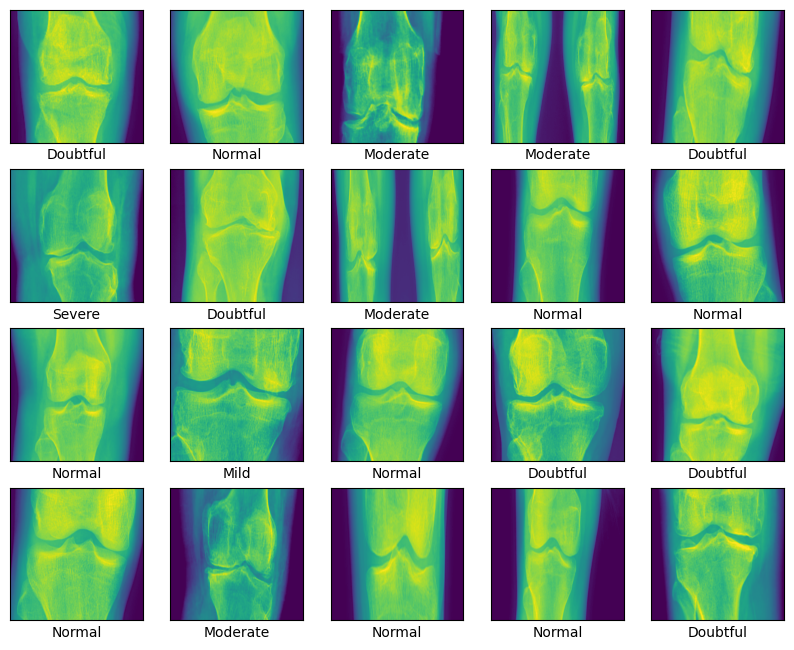

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [61]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 181s 5s/step - loss: 1.5405 - accuracy: 0.3072 - val_loss: 1.5240 - val_accuracy: 0.2997
Epoch 2/100
38/38 [==============================] - 142s 4s/step - loss: 1.5008 - accuracy: 0.3342 - val_loss: 1.4804 - val_accuracy: 0.3199
Epoch 3/100
38/38 [==============================] - 157s 4s/step - loss: 1.4793 - accuracy: 0.3535 - val_loss: 1.4432 - val_accuracy: 0.3468
Epoch 4/100
38/38 [==============================] - 165s 4s/step - loss: 1.4571 - accuracy: 0.3476 - val_loss: 1.4194 - val_accuracy: 0.3468
Epoch 5/100
38/38 [==============================] - 146s 4s/step - loss: 1.4409 - accuracy: 0.3721 - val_loss: 1.4360 - val_accuracy: 0.3771
Epoch 6/100
38/38 [==============================] - 145s 4s/step - loss: 1.4137 - accuracy: 0.3822 - val_loss: 1.3970 - val_accuracy: 0.3704
Epoch 7/100
38/38 [==============================] - 144s 4s/step - loss: 1.3847 - accuracy: 0.4141 - val_loss: 1.3860 - val_accuracy: 0.3973
Epoch 

38/38 [==============================] - 137s 4s/step - loss: 0.0252 - accuracy: 0.9907 - val_loss: 3.1933 - val_accuracy: 0.5556
Epoch 59/100
38/38 [==============================] - 137s 4s/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 3.3391 - val_accuracy: 0.5387
Epoch 60/100
38/38 [==============================] - 135s 4s/step - loss: 0.0331 - accuracy: 0.9848 - val_loss: 3.0326 - val_accuracy: 0.5387
Epoch 61/100
38/38 [==============================] - 133s 3s/step - loss: 0.0280 - accuracy: 0.9899 - val_loss: 3.2644 - val_accuracy: 0.5387
Epoch 62/100
38/38 [==============================] - 134s 4s/step - loss: 0.0394 - accuracy: 0.9806 - val_loss: 3.5474 - val_accuracy: 0.5219
Epoch 63/100
38/38 [==============================] - 133s 3s/step - loss: 0.0363 - accuracy: 0.9865 - val_loss: 3.2347 - val_accuracy: 0.5522
Epoch 64/100
38/38 [==============================] - 134s 4s/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 3.2250 - val_accuracy: 0.5219
Epoch 65/100

In [74]:
model.save('model.h5')

In [63]:
from matplotlib import pyplot as plt

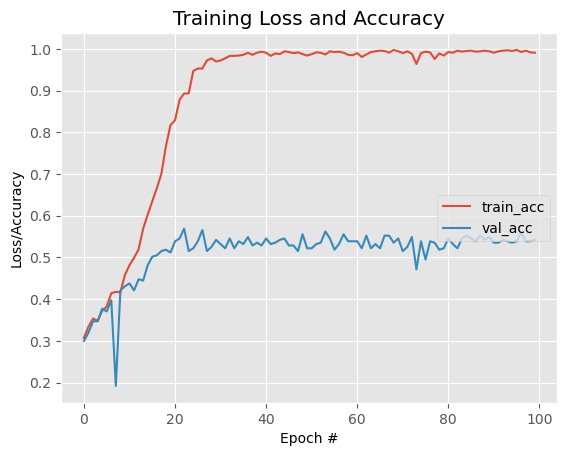

In [78]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy Curves")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model_Accuracy")

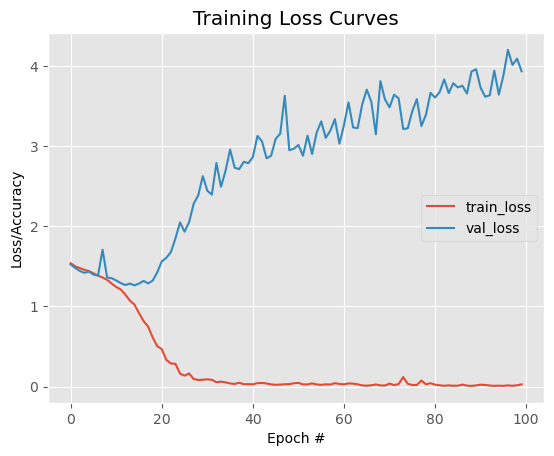

In [80]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss Curves")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="center right")
plt.savefig("CNN_Model_Accuracy")

In [76]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 5.333332061767578 %
test accuracy: 0.46060606837272644 %


1/1 [==============================] - 0s 49ms/step
A.I predicts: Doubtful
Correct prediction for label 3 is Normal


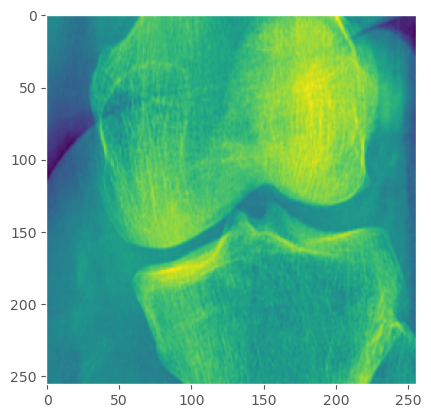

In [77]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

In [68]:
pip install scikit-learn

In [70]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


6/6 [==============================] - 4s 597ms/step


<Figure size 640x480 with 0 Axes>

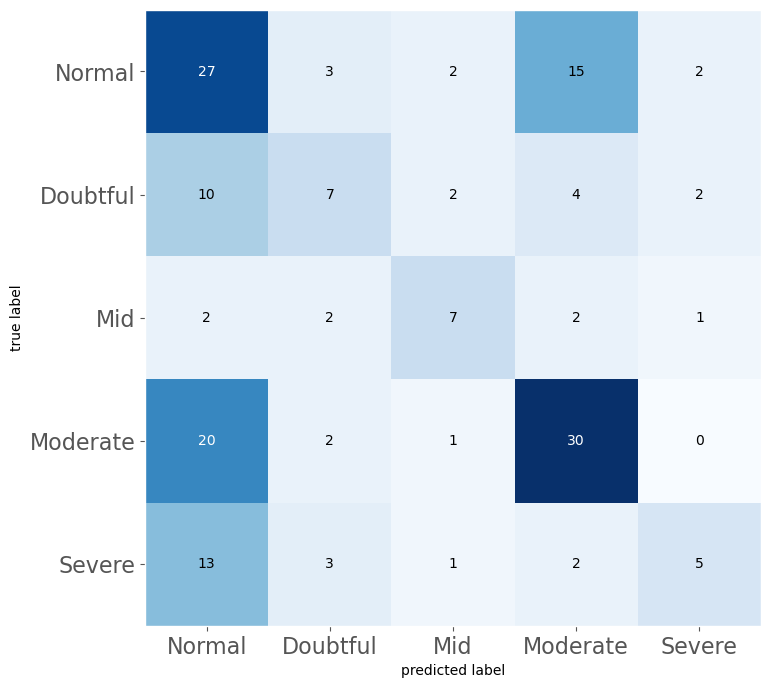

In [71]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()